# Misturas não ideais

<font size ="4">Em várias situações a aproximação do gás ideal ou solução ideal leva a erros consideráveis nos parâmetros desejados. Uma aproximação muito adotada é manter a forma funcional mais simples das propriedades desejadas e incluir uma correção no modelo ideal. <font>

## Mistura de Gases Reais

<font size = "4">
Para o caso da mistura de gases reais, a grandeza que corrige a propriedades termodinâmicas é a fugacidade, f. Esta é considerada como uma pressão eficaz do gás.Ela é definida como:

$$ f_i = \phi p_i $$

Onde $f_i$ é fugacidade do gás i, $p_i$ é a pressão parcial e $\phi$ é o coeficiente de fugacidade. O coeficiente de fugacidade é obtido a partir da depedência do fator de compressibilidade em função da pressão, de acordo com a integral:

$$  ln\phi = \int_{0}^{p} \frac{Z-1}{p} dp $$

<font>

In [9]:
#Importação dos módulos necessários para resolução destes exercícios

import numpy as np
from scipy.integrate import simps #método de Simpson para integração numérica
import matplotlib.pyplot as plt
from scipy.optimize import fsolve #biblioteca para ajuste de modelos matemáticos
from scipy.optimize import curve_fit

## Exemplo 6

<font size ="4">Determine $ \phi$ e f para $O_2(g)$ a 1000 bar e 0ºC a partir dos seguintes dados:

|   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|
|p(bar)   |  1 | 100  | 200  | 300  | 400  | 500  | 600  | 700  | 800  | 900  | 1000  |
|$V_m$ (L/mol)   | 22.710  | 0.2098  | 0.1045  | 0.0715  | 0.0601  | 0.0527  | 0.0471  | 0.0443  | 0.0420  | 0.0403  | 0.0.384  |

<font>

## Solução

<font size ="4">
Para gases reais: $ ln\phi = \int_{0}^{p} \frac{Z-1}{p} dp$

$Z = \frac{V_m}{V_{m,id}} = \frac{pV_m}{RT}$

Substituindo a definição e Z na primeira equação:

$ ln\phi = \int_{0}^{p} (\frac{V_m}{RT} -\frac{1}{p})dp$

A área sob o gráfico de $(\frac{V_m}{RT} -\frac{1}{p})$ versus p é exatamente a $ln \phi$.

O jeito mais simples de resolver este problema é usando um método de integração numérica como a regra do trapézio ou regra e Simpson. Nestes casos não é necessário o ajuste de um polinômio aos dados do problema para posterior integração da função obtida.

<font>

In [3]:
R = 0.08314   # L bar / K mol
T = 273.15    # K
pi = 1000.0    # bar


p = np.array([1.,100., 200., 300., 400., 500., 600., 700., 800., 900., 1000.])
V = np.array([22.710, 0.2098, 0.1045, 0.0715, 0.0601, 0.0527, 0.0471, 0.0443, 0.0420, 0.0403, 0.0384])

ordenada = V/(R*T) - 1/p

ln_phi = simps(ordenada, p)  # integração usando a regra de trapézio

phi = np.exp(ln_phi) 
f = pi * phi


print('Coeficiente de fugacidade = ' + format(phi , '6.3f'))
print('Fugacidade (bar) = ' + format(f, '6.3e'))

Coeficiente de fugacidade =  1.161
Fugacidade (bar) = 1.161e+03


<function matplotlib.pyplot.show(*args, **kw)>

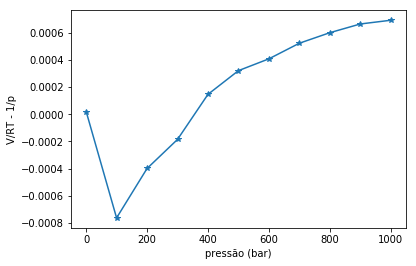

In [4]:
#vamos construir o gráfico só para ilustrar a forma dele.

plt.plot(p,ordenada,'-*')
plt.xlabel('pressão (bar)')
plt.ylabel('V/RT - 1/p')
plt.show

## Exemplo 5
<font size="4"> Gillespie e Beattie (Phys. Rev. 36:743–753 (1930)) computaram o parâmetro $K_{\phi}$ para síntese da amônia, representando o volume específico de vários gases pela equação de estado de Bettie-Bridgeman. Os resultados tem a seguinte forma:

$$ log(\frac{1}{K_{\phi}}) = (\frac{0.119184}{T}+\frac{91.87212}{T^2}+\frac{25122730}{T^4}) \times P $$ 


Onde T e P são informados em K e atm, respectivamente.  Levando em consideração os desvios da idealidade, repita o cálculo da conversão no equilíbrio. <font >

## Solução

<font size="4"> Em altas pressões o modelo do gás ideal não pode ser usado. Logo, a constante de equilíbrio deve ser escrita em termos das fugacidades dos gases:

$$ K = \frac{f_{NH_3}}{f_{N_2} ^{0.5} f_{H_2} ^{1.5}} =  \frac{\phi_{NH_3}}{\phi_{N_2} ^{0.5} \phi_{H_2} ^{1.5}} \times \frac{p_{NH_3}}{p_{N_2} ^{0.5} p_{H_2} ^{1.5}} = K_{\phi} K_p$$

A partir da nova constante de equilíbrio é possível calcular a conversão no equilíbrio usando o quadro que expressa o equilíbrio: 

|       |       |       |       |       |
|:-----:|:-----:|:-----:|:-----:|:-----:|
|  |0.5$N_2$ |1.5$H_2$ |$NH_3$| |
|ini |0.5| 1.5 | 0 |
|eq | 0.5-0.5x | 1.5-1.5x | x |
|x | $ \frac{0.5-0.5x}{2.0-x}$ | $ \frac{1.5-1.5x}{2.0-x}$ | $ \frac{x}{2.0-x}  $  |

$ K_x = \frac{\frac{x}{2.0-x}}{(\frac{0.5-0.5x}{2.0-x})^{0.5} \times (\frac{1.5-1.5x}{2.0-x})^{1.5}}  $ <font>

In [7]:
#Inicialização das variáveis
T = 273.15+400              #[K] 
P = 150                     #[atm]
P_bar = 150*1.01325 


K_673 = 0.013              

K_fi = (10**((0.1191849/T + 91.87212/T**2 + 25122730/T**4)*P))**(-1)

K = (K_673/K_fi)*P**(1.5+0.5-1)


def f(x): 
	 return  (x/(2-x))/(((0.5-0.5*x)/(2-x))**(0.5)*((1.5-1.5*x)/(2-x))**(1.5))- K
        
x = fsolve(f,0.5)

x_NH3 = x/(2-x)

print("A fração molar de amônia no equilíbrio é  %0.2f"%(x_NH3))

A fração molar de amônia no equilíbrio é  0.33


/home/leobap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


<function matplotlib.pyplot.show(*args, **kw)>

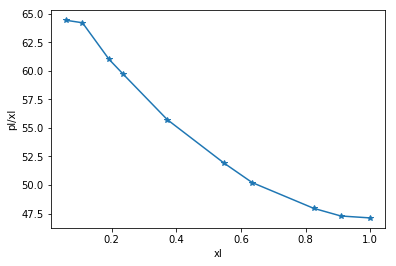

In [2]:
#atkins 5.8

xI = np.array([0.0,0.0579,0.1095,0.1918,0.2353,0.3718,0.5478,0.6349,0.8253,0.9093,1.0])
pI = np.array([0.0,3.73,7.03,11.7,14.05,20.72,28.44,31.88,39.58,43.0,47.12])
pA = np.array([37.38,35.48,33.64,30.85,29.44,25.05,19.23,16.39,8.88,5.09,0])




pI_xI = pI/xI

plt.plot(xI,pI_xI,'-*')
plt.xlabel('xI')
plt.ylabel('pI/xI')
plt.show


In [3]:
#a)
gama_I = pI/(xI*47.12)
print(gama_I)

gama_A = pA/((1-xI)*37.38)
print(gama_A)


[       nan 1.36717776 1.36249816 1.29458919 1.26721153 1.18270133
 1.10179877 1.06563311 1.01779113 1.00358921 1.        ]
[1.         1.00750523 1.01060808 1.0211676  1.02992931 1.06676928
 1.13765199 1.20095801 1.35981793 1.50131284        nan]


/home/leobap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/leobap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<function matplotlib.pyplot.show(*args, **kw)>

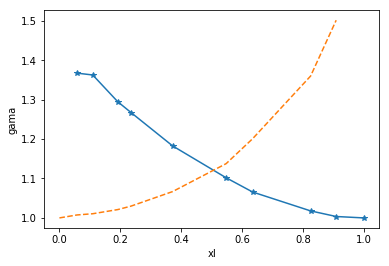

In [19]:
plt.plot(xI,gama_I,'-*')
plt.plot(xI,gama_A,'--')
plt.xlabel('xI')
plt.ylabel('gama')
plt.show

In [11]:
#b)

x=xI[:2]
p=pI[:2]

def henry(x):
    
    return K*x

popt, pcov = curve_fit(henry, x, p)



ValueError: Unable to determine number of fit parameters.

<function matplotlib.pyplot.show(*args, **kw)>

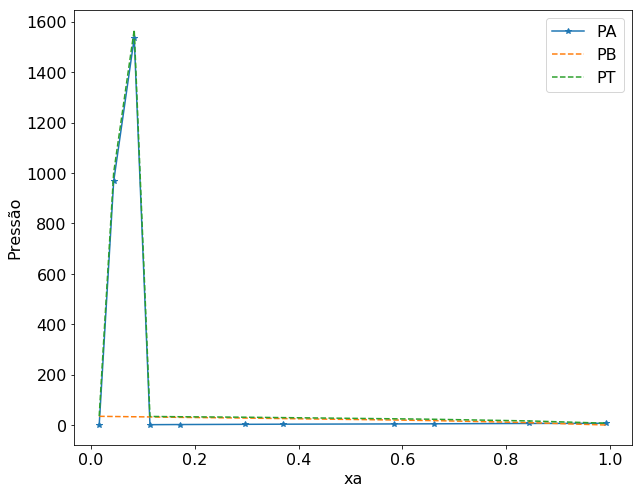

In [24]:
# atkins 5.9

xA = np.array([0.016,0.0439,0.0835,0.1138,0.1714,0.2973,0.3696,0.5834,0.6604,0.8437,0.9931])
PA = np.array([0.484,967,1535,1.89,2.45,3.31,3.83,4.84,5.36,6.76,7.29])
PB = np.array([35.05,34.29,33.28,32.64,30.9,28.16,26.08,20.42,18.01,10,0.47])

pT = PA + PB

# Criando os gráficos
# estes dois parâmetros precisam aparecer antes da definição do plot
plt.rcParams.update({'font.size': 16}) #define o tamanho da fonte
plt.figure(figsize=(10,8)) #define as dimensões do gráfico

plt.plot(xA,PA,'-*',label='PA')
plt.plot(xA,PB,'--', label='PB')
plt.plot(xA,pT,'--', label='PT')
plt.xlabel('xa')
plt.ylabel('Pressão')
plt.legend(loc='best')
plt.show
